# Visualing the Spray Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import chain
from math import sin, cos, sqrt, atan2, radians

mapdata = np.loadtxt("../data/mapdata_copyright_openstreetmap_contributors.txt")

traps = pd.read_csv('../data/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']].values
spray = pd.read_csv('../data/spray_cleaned.csv')[['Date','Longitude', 'Latitude']].values

## All Trap and Spray locations

The plot below shows all the sprayed locations in blue and the trap locations in orange. There is a spray location in the northwest without any traps nearby, so we'll focus on where the traps actually are. 

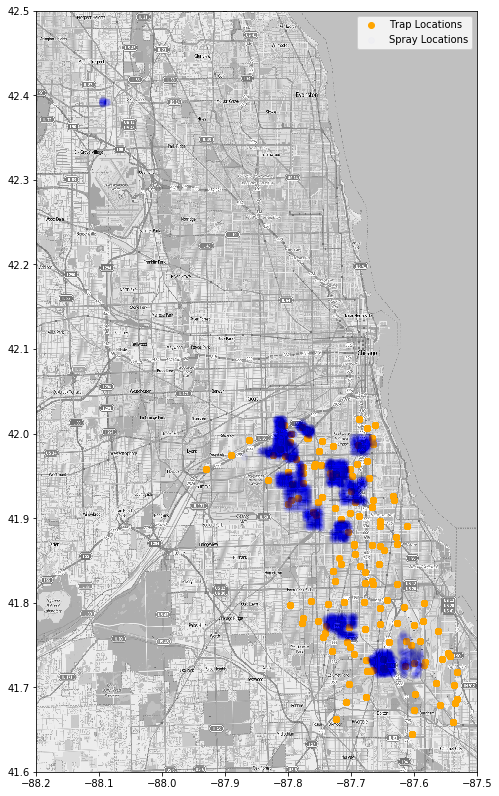

In [2]:
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88.2, -87.5, 41.6, 42.5)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

plt.scatter(traps[:,2], traps[:,3], marker='o',\
            color='orange', label='Trap Locations')

plt.scatter(spray[:,1], spray[:,2], marker='o',\
            color='blue', label='Spray Locations', alpha=.01)

plt.legend()


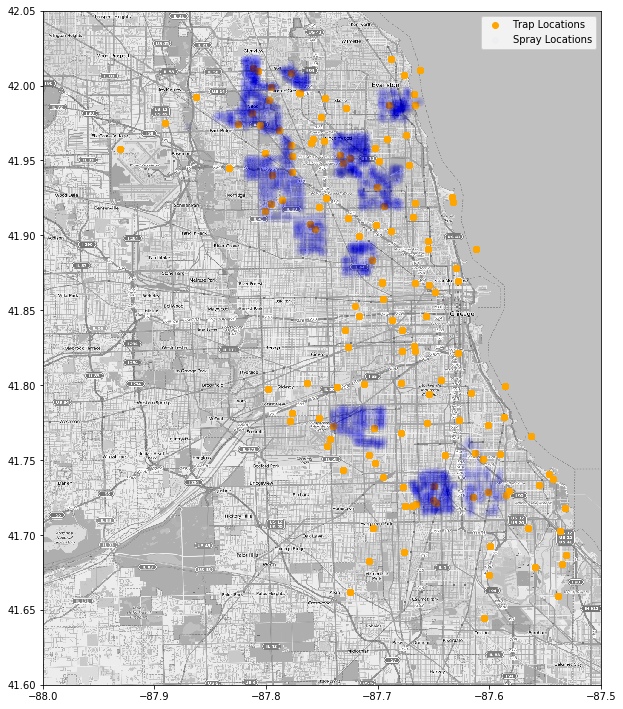

In [3]:
lon_lat_box = (-88, -87.5, 41.6, 42.05)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


trap_mask = (traps[:,2] >= lon_lat_box[0])
trap_mask = (traps[:,2] <= lon_lat_box[1]) & trap_mask
trap_mask = (traps[:,3] >= lon_lat_box[2]) & trap_mask
trap_mask = (traps[:,3] <= lon_lat_box[3]) & trap_mask

spray_mask = (spray[:,1] >= lon_lat_box[0])
spray_mask = (spray[:,1] <= lon_lat_box[1]) & spray_mask
spray_mask = (spray[:,2] >= lon_lat_box[2]) & spray_mask
spray_mask = (spray[:,2] <= lon_lat_box[3]) & spray_mask

plt.scatter(traps[trap_mask][:,2], traps[trap_mask][:,3], marker='o',\
            color='orange', label='Trap Locations')
plt.scatter(spray[spray_mask][:,1], spray[spray_mask][:,2], marker='o',\
            color='blue', label='Spray Locations', alpha=.01)

plt.legend()

plt.savefig('../plots/heatmap.png')

## Traps and Spray locations by date

In [4]:
spray_dates = list(set(spray[:,0]))
spray_dates.sort()

spray_by_date = dict()

for date in spray_dates:
    spray_mask_tmp = spray_mask & (spray[:,0] == date)
    spray_data = spray[spray_mask_tmp]
    spray_by_date[date] = spray_data



In [5]:
len(spray_dates)

10

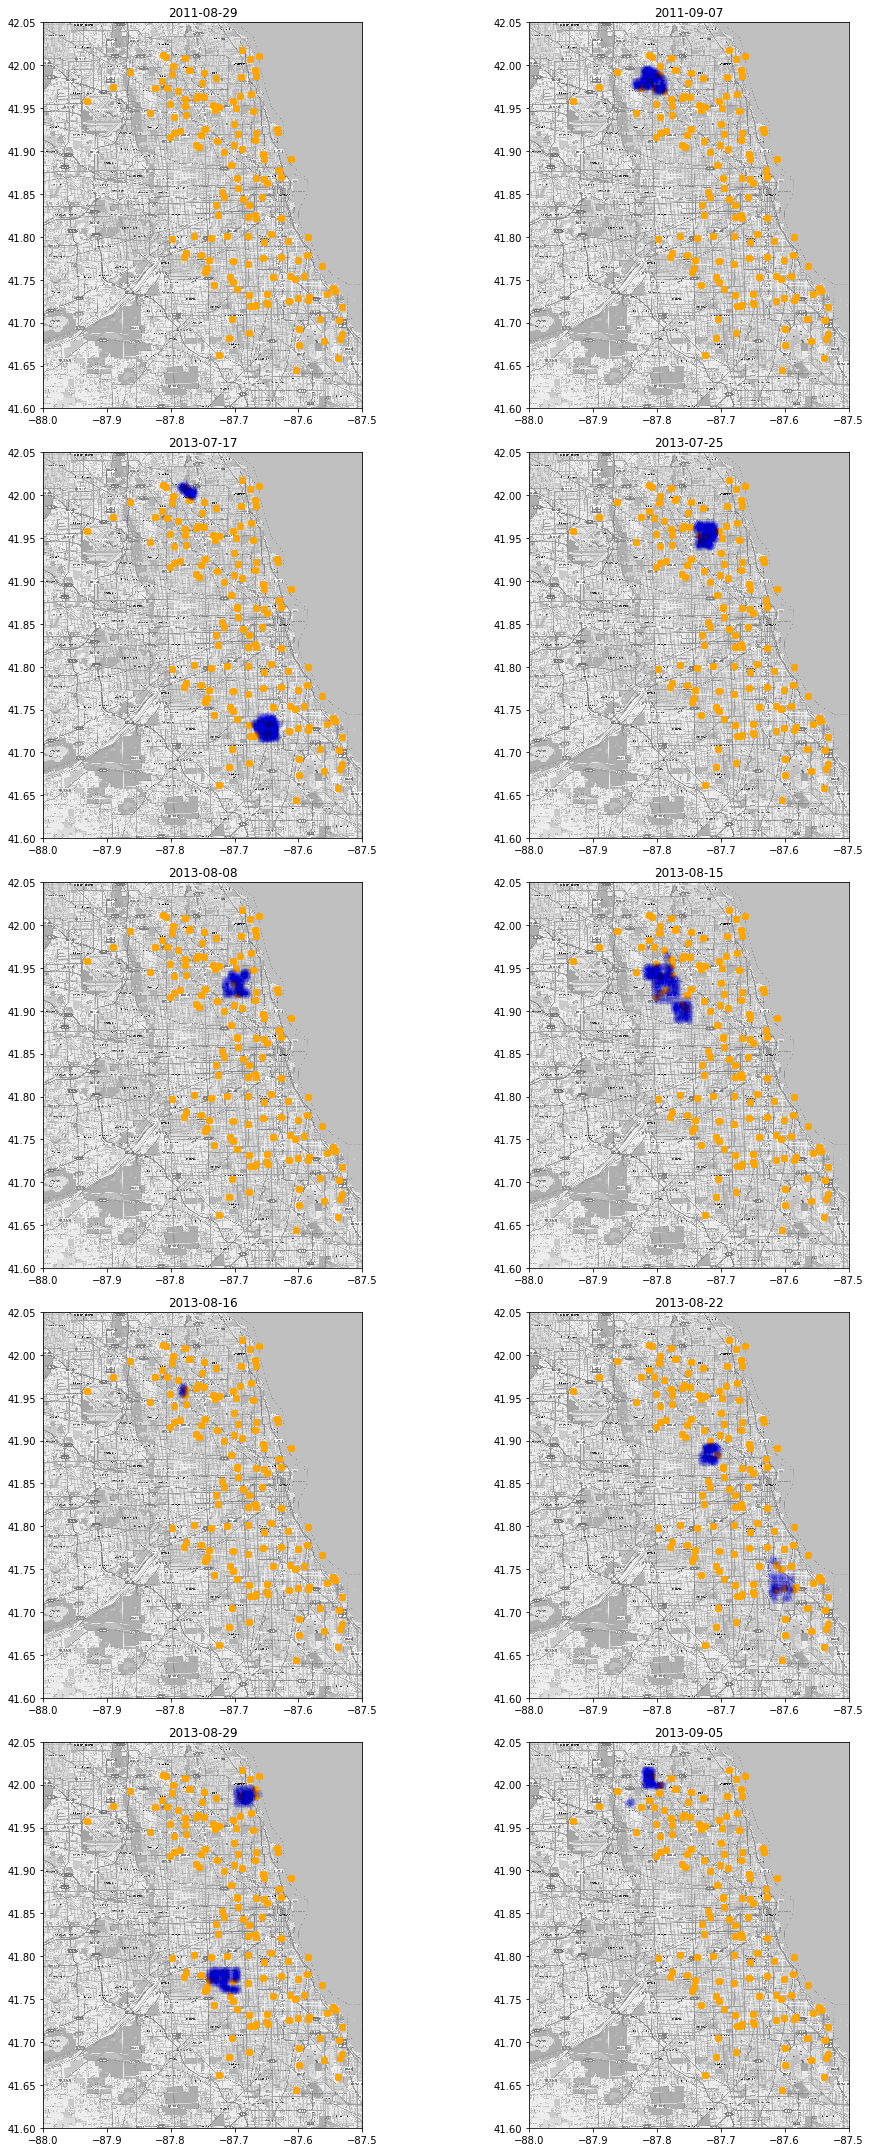

In [6]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))

for date, axis in zip(spray_dates, chain(*ax)):
    axis.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

    spray_tmp = spray_by_date[date]
    
    
    
    axis.scatter(traps[trap_mask][:,2], traps[trap_mask][:,3], marker='o',\
                color='orange', label='Trap Locations')
    axis.scatter(spray_tmp[:,1], spray_tmp[:,2], marker='o',\
                color='blue', label='Spray Locations', alpha=.01)
    axis.set_title(date)
plt.tight_layout()

plt.savefig('../plots/spray_by_date.png')

It's not too surprising that they don't spray the same locations every day, but it doesn't even seem like year by year they're doing the same locations.

## Traps and Spray locations by year

In [7]:
years_array = map(lambda date:date[:4], spray[:,0])
years_array = np.array([*years_array])

years = set(years_array)
years = list(years)
years.sort()

In [8]:
years

['2011', '2013']

In [9]:
spray_by_year = {}

for year in years:
    spray_mask_tmp = spray_mask & (years_array == year)
    spray_by_year[year] = spray[spray_mask_tmp]

In [10]:
spray_by_year.keys()

dict_keys(['2011', '2013'])

In [11]:
spray_by_year['2011'].shape

(1573, 3)

In [12]:
spray_by_year['2013'].shape

(12626, 3)

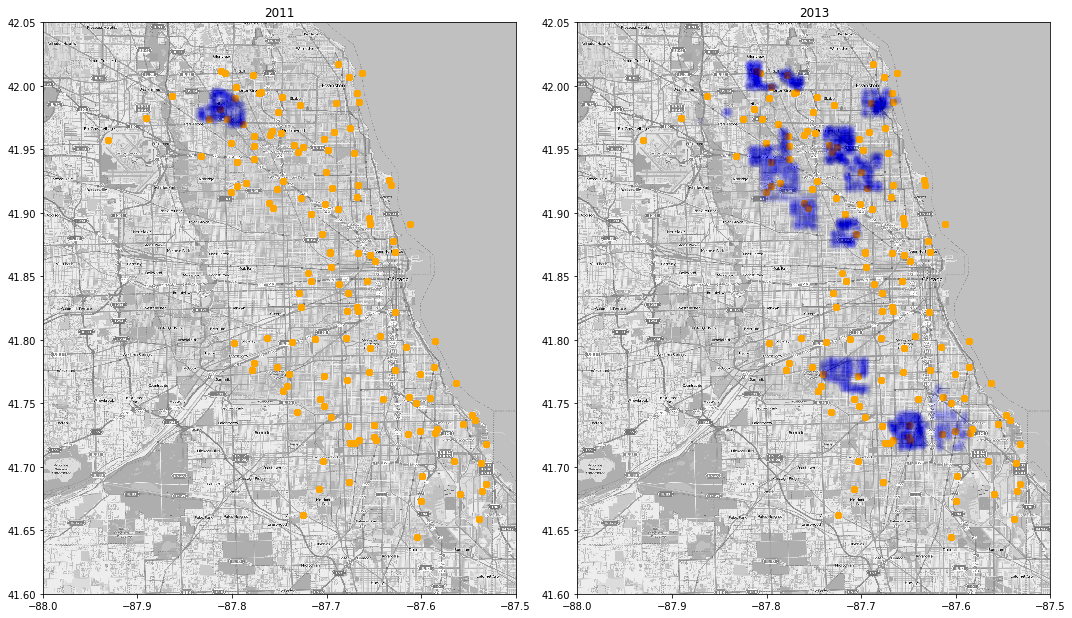

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

for year, axis in zip(spray_by_year, ax):
    axis.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

    spray_tmp = spray_by_year[year]
    
    axis.scatter(traps[trap_mask][:,2], traps[trap_mask][:,3], marker='o',\
                color='orange', label='Trap Locations')
    axis.scatter(spray_tmp[:,1], spray_tmp[:,2], marker='o',\
                color='blue', label='Spray Locations', alpha=.01)
    axis.set_title(year)
plt.tight_layout()
plt.savefig('../plots/spray_by_year.png')

## Summary 

Incorporating this data in a classification model will present challenges. First, we have no spraying data for the testing dates so we cannot directly use information about spraying near every year. In fact, when were doing the spray data cleaning, we already engineered a feature that will record whether or not a trap is with an eighth of a mile of a spray site. 